<a href="https://colab.research.google.com/github/dinooooooi/dinooooi/blob/main/0315%EA%B8%88%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4. 모델 훈련

###4.1 선형 회귀
입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 만듦

y.hat = h(x) = 벡터*x

모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

####4.1.1 정규방정식
비용함수를 최소화하는 베타값을 찾기 위한 해석적인 방법 = 정규방정식



In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [2]:
#세타.hat 계산
X_b=np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.31485529],
       [2.78621498]])

In [4]:
#세타.hat으로 예측
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.31485529],
       [9.88728526]])

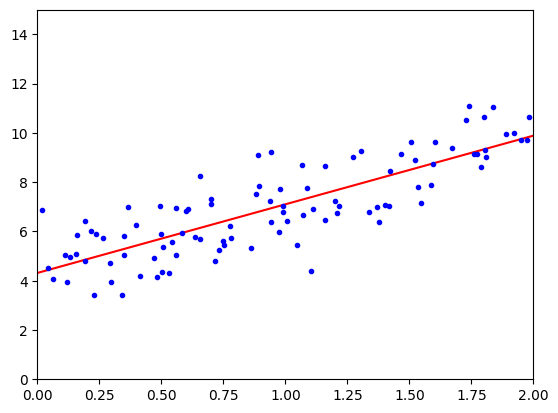

In [5]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.31485529],
       [9.88728526]])

In [7]:
theta_beta_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_beta_svd

array([[4.31485529],
       [2.78621498]])

In [8]:
#X+ 는 X의 유사역행렬
np.linalg.pinv(X_b).dot(y)

array([[4.31485529],
       [2.78621498]])

In [9]:
#유사역행렬 자체는 특잇값 분해라 부르는 표준 행렬 분해 기법을 사용해 계산



####4.1.2 계산 복잡도
역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)~O(n^3)사이

linearregression svd방법은 약 O(n^2)

특성, 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합
###4.2 경사 하강법
경사하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘. 비용함수를 최소화하기 위해 반복해서 파라미터 조정

세타 값을 임의로 설정해서 조금씩 비용 함수가 감소되는 방향으로 진행해 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

중요한 파라미터 :스텝의 크기 - 학습률 하이퍼 파라미터로 결정

무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴

선형 회귀를 위한 MSE비용 함수는 볼록함수 / 지역 최솟값이 없고 하나의 전역 최솟값만 있음, 연속함수, 기울기 변화 크지 않음

파라미터 공간에서 비용 함수를 최소화하는 모델 파라미터의 조합의 찾는 일임.
####4.2.1 배치 경사 하강법
세타j가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 함수가 편도함수






In [10]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta =theta - eta*gradients

In [11]:
theta

array([[4.31485529],
       [2.78621498]])

In [12]:
#적절한 학습률 찾으려면 그리드 탐색
#그리드 탐색 반복 횟수 제한
#벡터의 노름이 어떤 값보다 작아지면 경사 하강법이 최솟값에 도달한 것

####4.2.2 확률적 경사 하강법
매 스텝에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산

확률적이라 불안정함, 전역 최솟값을 찾을 가능성이 높다//지역 최솟값 탈출 가능, 전역 최솟값에 다다르지 못하게 한다는 단점 - 학습률을 점진적으로 감소시킴


In [13]:
n_epochs = 50
t0,t1 =5,50

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [14]:
# 일반적으로 한 반복에서 m번 되풀이되고 각 반복을 에포크라고 함
theta

array([[4.27564237],
       [2.76604942]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter =1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.35410419]), array([2.87116503]))

####4.2.3 미니배치 경사 하강법
미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산 / 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해 얻는 성능 향상

###4.3 다항 회귀
비선형 데이터를 학습하는데 선형 모델 사용 가능 - 각 특성의 거듭제곱을 새로운 특성으로 추가, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킴 : 다항 회귀


In [17]:
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([3.59598914])

In [19]:
X_poly[0]

array([ 3.59598914, 12.93113791])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02775281]), array([[0.97233501, 0.4991924 ]]))


###4.4 학습 곡선
훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델 과대적합

양쪽에 모두 좋지 않으면 과소적합

or 학습 곡선 살펴보기

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증세트")

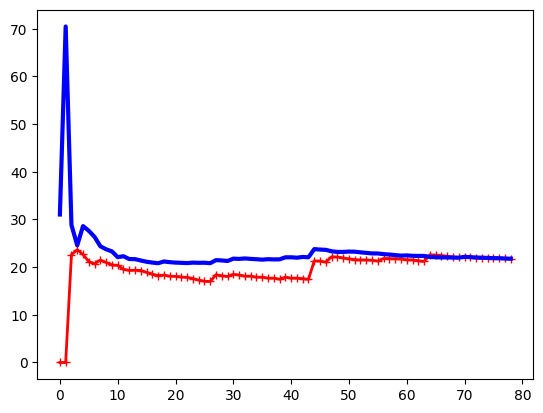

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [23]:
#과소적합 모델의 전형적인 모습 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음

(0.0, 3.0)

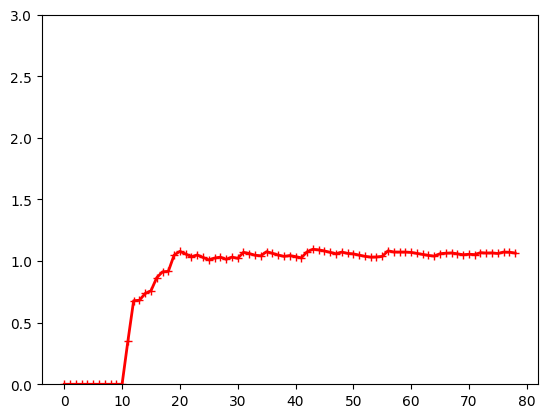

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
]
)
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 3.0)

In [25]:
#훈련 데이터의 오차가 선형 회귀모델보다 훨씬 낮음,
# 두 곡선 사이에 공간이 있음 과대적합 모델의 특징임

###4.5 규제가 있는 선형 모델
과대적합을 감소시키는 방법은 모델을 규제하는 것, 다항식의 차수를 감소시킴
####4.5.1 릿지 회귀
: 규제가 추가된 선형 회귀 버전


하이퍼파라미터 알파로 모델을 얼마나 많이 규제할지 조절

알파=0이면 릿지 회귀는 선형 회귀와 같아짐
알파가 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨

In [26]:
#정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.73414149]])

In [27]:
#확률적 경사 하강법 사용
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([7.8972232])

####4.5.2 라쏘 회귀

덜 중요한 특성의 가중치 제거

자동으로 특성 선택하고 희소 모델 만듦

라쏘의 비용 함수는 세타가 0일 때 미분 가능하지 않음, 서브그레이디언트 벡터g를 사용하면 경사 하강법을 적용 가능

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.74346054])

####4.5.3 엘라스틱넷
릿지와 라쏘 회귀를 절충한 모델

혼합 정도는 비율 r을 사용
r=0이면 릿지 회귀와 같고 r=1이면 라쏘 회귀와 같음

특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호함

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([8.75681165])

####4.5.4 조기 종료
:반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값을 도달하면 바로 훈련을 중지시킴

In [30]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [31]:
#warm_start=True로 지정하면 fit()메서드가 호출될 때 처음부터 시작하지 않고 이전 모델 파라미터에서 훈련 이어함

###4.6 로지스틱 회귀
: 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨

추정 확률이 50%넘으면 레이블 1 양성클래스 해당 클래스에 속함
아니면 클래스에 속하지 않음 레이블 0 음성 클래스
- 이진 분류기


####4.6.1 확률 추정
로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하고 결괏값의 로지스틱을 출력

로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수
####4.6.2 훈련과 비용
훈련의 목적은 양성 샘플에 대해서 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것

t가 0에 가까워지면 -log(t)가 매우 커지는 식으로 타당함 - 음성 샘플을 0 혹은 1에 가까운 확률로 추정하면 비용이 크게 증가

전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것 = 로그 손실

볼록 함수이므로 경사하강법이 전역 최솟값 찾는 것 보장

모든 편도 함수를 포함한 그레이디언트 벡터를 만들면 배치 경사 하강법 알고리즘 사용/ 확률적 경사하강법 : 한번에 하나의 샘플, 미니배치 경사 하강법 : 한번에 하나의 미니 배치를 사용
####4.6.3 결정 경계

In [32]:
#붓꽃데이터에서 iris-versicolor 종 감지하는 분류기 만들기
#데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [41]:
X=iris["data"][:,3:] #꽃잎의 너비

In [38]:
y=(iris["target"]==2).astype(int) #1iris-virginica면 1, 그렇지 않으면 0

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

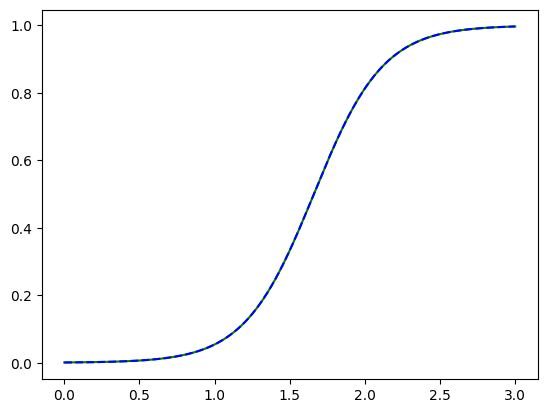

In [43]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label="Irisvirginica")
plt.plot(X_new, y_proba[:,1],"b--", label="Not Iris virginica")
#다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

In [44]:
#양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정경계가 만들어짐.
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [45]:
#점선은 모델이 50% 확률을 추정하는 지점으로 이 모델의 결정 경계임. - 선형
# 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 iris-virginica라고 판단할 것
#로지스틱 회귀도 l1, l2 패널티를 사용해 규제할 수 있음. l2 패널티가 기본

####4.6.4 소프트맥스 회귀
로지스틱 회귀 모델이 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음 : 소프트맥스 회귀, 다항 로지스틱 회귀

샘플x가 주어지면 먼저 소프트 맥스 회귀 모델이 각 클래스에 대헌 점수를 계산하고 그 점수에 소프트맥스 함수를 적용해 각 클래스의 확률을 추정, 추정확률이 가장 높은 클래스를 선택함

각 클래스는 자신만의 파라미터 벡터가 있음. 이 벡터들은 파라미터 행렬에 행으로 저장됨

크로스 엔트로피 비용 함수를 최소화하는 것이 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제함


In [46]:
#클래스가 둘 이상일 때 기본적으로 일대다 전략 사용
#multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀 사용 가능
#소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘 지정해야함
X = iris["data"][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [47]:
softmax_reg.predict([[5,2]])

array([2])

In [48]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
#94.2% 확률로 클래스2라고 출력할 것
#결정경계 선형